### Kodiak D1

In [21]:
import glob
import pandas as pd
from obspy import read_events
import obspy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime
import ssl
from obspy import read
from obspy import Stream
from obspy import Trace
from obspy import UTCDateTime
#from geopy.distance import geodesic
from obspy.geodetics import gps2dist_azimuth
#import geopy
import numpy as np

stations = ['100','101','102','103','104','105','106','107','108','109','110',
            '111','112','113','114','115','116','117','118','119','120','121','122',
           '123','124','125'] #102 has different station code
jul_start = []
jul_end = []
start_time1 = []
end_time1 = []
elapsed_time = []
for i in range(len(stations)):
    station = stations[i]
    folder = "/Volumes/ArmorATD3/ARRAYS_BACKUP/2025_09_kodiak_d1_mseed"
    
    pattern = f"{folder}/4E.{station}..DHZ.2025.*"
    
    files = glob.glob(pattern)
    julstart = files[0][-3:]
    julend = files[-1][-3:]
    jul_start.append(julstart)
    jul_end.append(julend)
    #Find UTC start and end time--------------------------
    
    st_start =  read(folder + '/4E.'+station+'..DHZ.2025.'+julstart)# YOUR INPUT HERE
    st_end =  read(folder + '/4E.'+station+'..DHZ.2025.'+julend)# YOUR INPUT HERE
    
    tmin = min([tr.stats.starttime for tr in st_start])
    tmax = max([tr.stats.endtime for tr in st_end])
    elapsed = (tmax - tmin)/(60*60*24)
    print(elapsed)
    elapsed_time.append(elapsed)
    start_time1.append(tmin)
    end_time1.append(tmax)
    print(station+' finished')
#print(jul_start)
#print(jul_end)
df = pd.DataFrame({
        'station': stations,
        'julday_start_d1': jul_start,
        'jul_day_end_d1': jul_end,
        'start_mseed_d1': start_time1,
        'end_mseed_d1': end_time1,
        'elapsed_time_d1': elapsed_time
                  
                  })

33.751041620370366
100 finished
33.69652773148148
101 finished
33.30104162037037
102 finished
31.42604162037037
103 finished
33.13472217592592
104 finished
32.66041662037037
105 finished
31.894097175925925
106 finished
29.11423606481481
107 finished
32.99027773148148
108 finished
32.30173606481481
109 finished
33.93194439814815
110 finished
33.65451384259259
111 finished
33.988194398148146
112 finished
33.78055550925926
113 finished
30.509722175925923
114 finished
31.89166662037037
115 finished
32.88993050925926
116 finished
32.761805509259254
117 finished
32.38506939814815
118 finished
31.836805509259257
119 finished
33.015972175925924
120 finished
32.91909717592593
121 finished
34.65972217592592
122 finished
29.446874953703702
123 finished
33.78194439814815
124 finished
33.40555550925926
125 finished


### Kodiak D2

In [22]:
import glob

stations = ['100','101','102','103','104','105','106','107','108','109','110',
            '111','112','113','114','115','116','117','118','119','120','121','122',
           '123','124','125'] 
jul_start = []
jul_end = []
start_time = []
end_time = []
elapsed_time = []
for i in range(len(stations)):
    station = stations[i]
    folder = "/Volumes/BARRY_2021/KODIAK_DATA/2025_10_kodiak_d2_mseed"
    #if station == '102':
    pattern = f"{folder}/4E.{station}..DHZ.2025.*"
    #else:
    
    files = glob.glob(pattern)
    julstart = files[0][-3:]
    julend = files[-1][-3:]
    jul_start.append(julstart)
    jul_end.append(julend)
    #Find UTC start and end time--------------------------
    
    st_start =  read(folder + '/4E.'+station+'..DHZ.2025.'+julstart)# YOUR INPUT HERE
    st_end =  read(folder + '/4E.'+station+'..DHZ.2025.'+julend)# YOUR INPUT HERE
    
    tmin = min([tr.stats.starttime for tr in st_start])
    tmax = max([tr.stats.endtime for tr in st_end])
    elapsed = (tmax - tmin)/(60*60*24)
    print(elapsed)
    elapsed_time.append(elapsed)
    start_time.append(tmin)
    end_time.append(tmax)
    print(station+' finished')
#print(jul_start)
#print(jul_end)
df2 = pd.DataFrame({
        'station': stations,
        'julday_start_d2': jul_start,
        'jul_day_end_d2': jul_end,
        'start_mseed_d2': start_time,
        'end_mseed_d2': end_time,
        'elapsed_time_d2': elapsed_time
                  
                  })

27.38263884259259
100 finished
29.25277773148148
101 finished
24.258333287037036
102 finished
23.343749953703703
103 finished
21.806249953703706
104 finished
29.236111064814814
105 finished
29.111458287037035
106 finished
28.840624953703703
107 finished
21.573263842592592
108 finished
25.197569398148147
109 finished
27.925347175925925
110 finished
29.092708287037034
111 finished
28.698958287037033
112 finished
27.752430509259256
113 finished
25.23854162037037
114 finished
29.885763842592592
115 finished
27.407986064814814
116 finished
28.997569398148148
117 finished
23.98819439814815
118 finished
26.914930509259257
119 finished
28.677083287037036
120 finished
29.088888842592592
121 finished
28.60590273148148
122 finished
28.48888884259259
123 finished
26.675694398148146
124 finished
24.905208287037034
125 finished


In [34]:
type(df3['start_mseed_d1'][0])

obspy.core.utcdatetime.UTCDateTime

In [35]:
start = UTCDateTime(start_dep)
end = UTCDateTime(end_dep)


df3 = pd.merge(df,df2, on='station', how='outer')
df3['total_time_data'] = df3['elapsed_time_d1']+df3['elapsed_time_d2']
### Add time delays---------------------------
time_del_start = []
time_del_end = []
for i in range(len(df3)):
    time1 = df3['start_mseed_d1'].to_numpy()[i]
    time2 = df3['end_mseed_d2'].to_numpy()[i]
    time_del_start.append(abs(start - time1)/(60*60))
    time_del_end.append(abs(end - time2)/(60*60))
df3['missing_time_start'] = time_del_start
df3['missing_time_end'] = time_del_end
#df3['missing_time_start'] = (start - df3['start_mseed_d1'].to_numpy())/(60*60)
#df3['missing_time_end'] = (end - df3['end_mseed_d2'].to_numpy())/(60*60)
df4 = df3.dropna()
temp = pd.DataFrame((df4['start_mseed_d2'] - df4['end_mseed_d1'])/(60*60), columns = ['missing_time_hours'])
temp2 = df4['station']
df5 = pd.concat([temp,temp2], axis = 1)
df3 = pd.merge(df3,df5, on='station', how='outer')

#df3['bear_removal_time_d1'] = np.array([0,0,0,0,0,0,0,0,0,0,0,0,'2025-10-03T05:56:00',0,0,0,0,0,0,0,0,0,'2025-10-03T05:38:00','2025-09-09T17:36:00',0,0])
#df3['bear_removal_time_d2'] = np.array([0,0,0,0,0,0,0,0,"2025-10-17T11:08:00",0,0,0,'2025-10-20T17:41:00',0,0,0,0,0,0,0,0,'2025-10-21T03:38:00',0,0,0,0])
df3['station_name'] = np.array(['KD24','KD22','KD25','KD23','KD26','KD21','KD10','KD05','KD19','KD17','KD11','KD13','KD12','KD14','KD06',
                                'KD01','KD02','KD03','KD04','KD08','KD07','KD16','KD15','KD09','KD20','KD18'])

df3 = df3.sort_values(by = 'station_name').reset_index(drop = True)
df3
df3.to_csv('/Users/cadequigley/Downloads/Research/deployment_array_design/kodiak_mseed_completeness.csv')

In [58]:
df3 = pd.read_csv('/Users/cadequigley/Downloads/Research/deployment_array_design/kodiak_mseed_completeness.csv')
df3['start_datetime'] = pd.to_datetime(df3['start_mseed_d1'], utc=True)
df3['end_datetime'] = pd.to_datetime(df3['end_mseed_d2'], utc=True)


start_dep = df3['start_datetime'].min()
end_dep = df3['end_datetime'].max()
print(start_dep)
print(end_dep)

2025-09-11 22:34:43.436000+00:00
2025-11-15 20:02:39.968000+00:00


In [60]:

import datetime as dt

start_dep = UTCDateTime(start_dep)
end_dep = UTCDateTime(end_dep)

df3 = pd.read_csv('/Users/cadequigley/Downloads/Research/deployment_array_design/kodiak_mseed_completeness.csv')

df5 = df3.copy()
df5 = df5.fillna(0)
df5 = df5.sort_values(by = 'station_name')
#df5 = df5.dropna()
times_start = df5['start_mseed_d1'].to_numpy()
times_end = df5['end_mseed_d1'].to_numpy()
times_start2 = df5['start_mseed_d2'].to_numpy()
times_end2 = df5['end_mseed_d2'].to_numpy()
elapsed_d1 = df5['elapsed_time_d1'].to_numpy()
elapsed_d2 = df5['elapsed_time_d2'].to_numpy()
elapsed_inter = df5['missing_time_hours'].to_numpy()
stations = df5['station_name'].to_numpy()

elapsed_start = df5['missing_time_start'].to_numpy()
elapsed_end = df5['missing_time_end'].to_numpy()
#bear_time_d1 = df5['bear_removal_time_d1'].to_numpy()
#bear_time_d2 = df5['bear_removal_time_d2'].to_numpy()

#Set up start times
matplot_begin = []
matplot_end = []
matplot_start1 = []
matplot_start2 = []
matplot_start3 = []

##Duration of first and second deployment
duration1 = []
duration2 = []
##Missing time 
missing_start = []
missing_end = []
inter = []


no_data = []
for i in range(len(times_start)):
    ##Missing time start-------------
    wa = str(start_dep)
    matplot_begin.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))
    missing_start.append(dt.timedelta(hours = elapsed_start[i]))
    ##Missing time end-------------
    wa = str(times_end2[i])
    matplot_end.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))
    missing_end.append(dt.timedelta(hours = elapsed_end[i]))
    ##First segment-----------------
    wa = str(times_start[i])
    matplot_start1.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))
    duration1.append(dt.timedelta(hours = elapsed_d1[i]*24))
    ##Between deployments-----------------
    wa = str(times_end[i])
    matplot_start2.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))
    inter.append(dt.timedelta(hours = elapsed_inter[i]))
    ##Second segment-----------------
    if times_start2[i] == '0': #stations that don't have any data-----------------
        wa = str(times_end[i])
        matplot_start3.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))
        duration2.append(dt.timedelta(hours = 31*24))
        no_data.append(1)
    else:
        wa = str(times_start2[i])
        matplot_start3.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))
        duration2.append(dt.timedelta(hours = elapsed_d2[i]*24))
        no_data.append(0)

        
    

In [59]:
df3 = df3.fillna(0)
###Completeness per station install time----------------------
denominator = df3['elapsed_time_d1'].to_numpy()+df3['elapsed_time_d2'].to_numpy()+(df3['missing_time_hours'].to_numpy()/24) #HM06 wrong doing this, fixing it manually
numerator = df3['elapsed_time_d1'].to_numpy()+df3['elapsed_time_d2'].to_numpy()-(df3['missing_time_hours'].to_numpy()/24)
df3['data_completeness'] = numerator/denominator

###Completeness in relation to whole array----------------------
denominator = df3['elapsed_time_d1'].to_numpy()+df3['elapsed_time_d2'].to_numpy()+(df3['missing_time_hours'].to_numpy()/24)+(df3['missing_time_start'].to_numpy()/24)+(df3['missing_time_end'].to_numpy()/24) #HM06 wrong doing this, fixing it manually
numerator = df3['elapsed_time_d1'].to_numpy()+df3['elapsed_time_d2'].to_numpy()-(df3['missing_time_hours'].to_numpy()/24)-(df3['missing_time_start'].to_numpy()/24)-(df3['missing_time_end'].to_numpy()/24)
df3['data_completeness_all'] = numerator/denominator
df3
df3.to_csv('/Users/cadequigley/Downloads/Research/deployment_array_design/kodiak_mseed_completeness.csv')

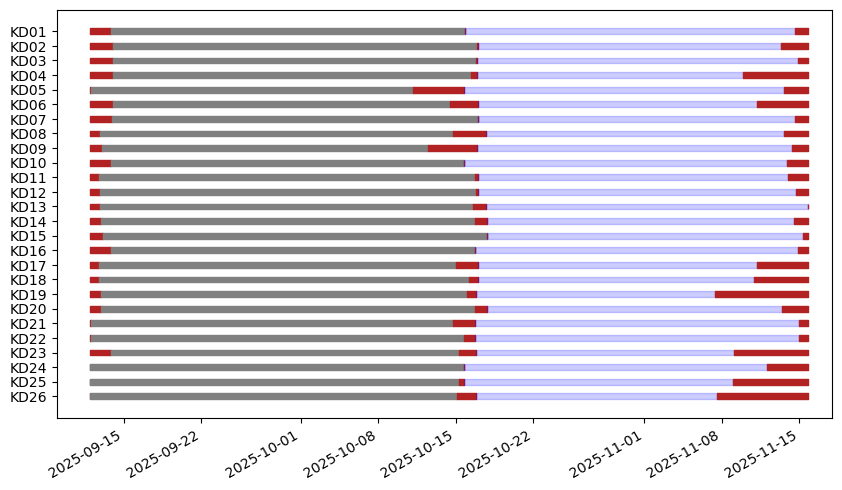

In [70]:
import datetime as dt
#cpu_1 = [(0, 3), (3.5, 1), (5, 5)]

fig, ax = plt.subplots(figsize = (10,6))
# broken_barh(xranges, (ymin, height))
for i in range(len(stations)):
    work0 = [(matplot_begin[i],missing_start[i])]
    work1 = [(matplot_start1[i],duration1[i])]
    work2 = [(matplot_start2[i],inter[i])]
    work3 = [(matplot_start3[i], duration2[i])]
    work4 = [(matplot_end[i],missing_end[i])]
    #nonwork = 
    ax.broken_barh(work0, (-0.2+i, 0.4), color = 'firebrick') #time between d1 and d2
    ax.broken_barh(work1, (-0.2+i, 0.4), color = 'gray' ) #working time d1
    ax.broken_barh(work2, (-0.2+i, 0.4), color = 'firebrick') #time between d1 and d2
    ax.broken_barh(work3, (-0.2+i, 0.4), color = 'blue', alpha = 0.2) #working time d2
    ax.broken_barh(work4, (-0.2+i, 0.4), color = 'firebrick') #time between d1 and d2
    
fig.autofmt_xdate()
#ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
#ax.set_xlim(0, 10)
ax.set_xlim(pd.to_datetime("2025-09-09"),
            pd.to_datetime("2025-11-18"))

ax.set_yticks(range(len(stations)),labels=list(stations))
ax.invert_yaxis()
plt.savefig('data_availability_kodiak_array.png', transparent=True, dpi = 720)
plt.show()


In [ ]:
### Earthquake plot

In [62]:
import pandas as pd
from obspy import read_events
import obspy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime
import ssl
from obspy import read
from obspy import Stream
from obspy import Trace
from obspy import UTCDateTime
#from geopy.distance import geodesic
from obspy.geodetics import gps2dist_azimuth
#import geopy
import numpy as np

max_rad = 500
min_mag = 3.5
array  = 'KOD'
df = pd.read_csv('~/Downloads/Research/kodiak_homer_earthquakes.csv')
df = df.sort_values(by='Time_utc')
df = df.reset_index(drop = True)
df = df[df[array+'_distance(km)'] < max_rad].reset_index(drop=True)
#df = df[df['Magnitude'] > min_mag].reset_index(drop=True)
df

,Unnamed: 0,index,Name,Depth (km),Magnitude,Latitude,Longitude,Time_utc,Time_ak,KOD_distance(km),KOD_backazimuth,KOD_array,HOM_distance(km),HOM_backazimuth,HOM_array,array
0,1,2982,ak025bhgzzqr,82.6,2.0,59.4392,-152.8351,2025-09-07T01:08:38.279000Z,2025-09-06T17:08:38.279000Z,224.205758,172.558210,KOD,97.915655,77.500917,HOM,NaN
1,9,2974,ak025bhier9a,45.3,2.1,61.2567,-147.9466,2025-09-07T03:45:22.865000Z,2025-09-06T19:45:22.865000Z,493.072996,212.443799,KOD,253.435724,225.338415,HOM,NaN
2,11,2972,ak025bhji90v,99.3,1.8,60.0120,-152.8274,2025-09-07T05:29:48.950000Z,2025-09-06T21:29:48.950000Z,287.558233,174.295997,KOD,104.273142,114.130947,HOM,NaN
3,12,2971,ak025bhjxeuh,35.3,1.3,60.9729,-150.8025,2025-09-07T06:00:22.818000Z,2025-09-06T22:00:22.818000Z,403.104768,193.349562,KOD,152.062174,187.222959,HOM,NaN
4,13,2970,ak025bhkk5l3,41.7,1.3,60.9295,-150.1381,2025-09-07T07:06:33.676000Z,2025-09-06T23:06:33.676000Z,408.494418,198.997712,KOD,156.256174,201.244613,HOM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,3014,14,ak025em4upow,141.1,2.3,58.5743,-155.4937,2025-11-14T13:36:01.516000Z,2025-11-14T05:36:01.516000Z,224.466419,122.825586,KOD,275.177855,63.144419,HOM,NaN
1282,3015,13,ak025em5954n,12.6,1.8,61.7094,-153.7238,2025-11-14T14:03:35.822000Z,2025-11-14T06:03:35.822000Z,481.627240,170.140623,KOD,272.383504,147.647600,HOM,NaN
1283,3018,10,ak025em62hhs,153.3,2.0,59.9582,-153.3809,2025-11-14T15:40:20.979000Z,2025-11-14T07:40:20.979000Z,286.515687,167.538455,KOD,131.335579,105.777487,HOM,NaN
1284,3019,9,ak025em65fs7,3.5,1.4,60.6029,-149.0926,2025-11-14T15:54:00.076000Z,2025-11-14T07:54:00.076000Z,398.629424,209.405638,KOD,158.129537,226.981171,HOM,NaN


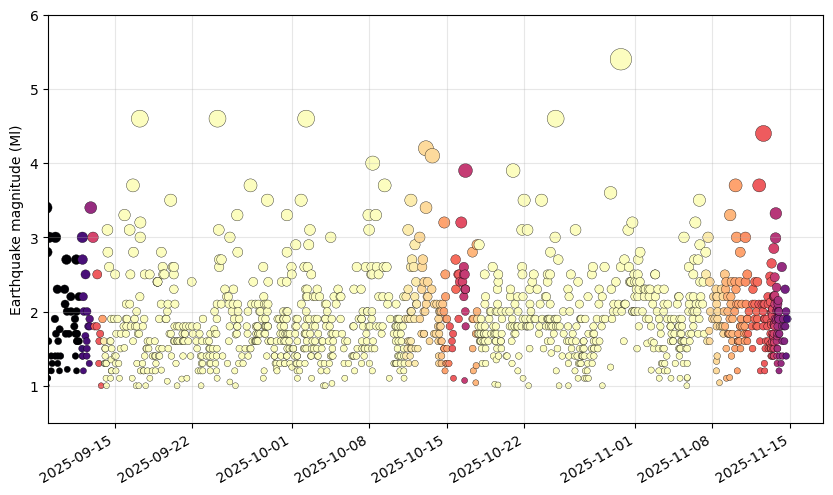

In [72]:
time_utc = df['Time_utc'].to_numpy()
mag = df['Magnitude'].to_numpy()
dist = df['KOD_distance(km)'].to_numpy()
times_matplot = []
for i in range(len(time_utc)):
    wa = time_utc[i]
    times_matplot.append(dt.datetime(int(wa[0:4]),int(wa[5:7]), int(wa[8:10]), int(wa[11:13]),int(wa[14:16]),int(wa[17:19])))

fig, ax = plt.subplots(figsize = (10,6))
#sc = ax.scatter(times_matplot, mag, c= dist, cmap = 'plasma_r', vmin = 0, vmax = 500, s = 8*(1.8**mag), linewidth = 0.25, edgecolors = 'black')
#sc = ax.scatter(times_matplot, mag, c= 100*(np.array(stations_available)/26), cmap = 'magma', vmin = 0, vmax = 100, s = 10*(1.8**mag), linewidth = 0.25, edgecolors = 'black')
ax.scatter(times_matplot, mag, c= 100*(np.array(stations_available)/26), cmap = 'magma', vmin = 0, vmax = 100, s = 10*(1.8**mag), linewidth = 0.25, edgecolors = 'black')
fig.autofmt_xdate()
#ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
#ax.set_xlim(0, 10)
ax.set_ylim(0.5,6)
ax.set_ylabel('Earthquake magnitude (Ml)')
ax.set_xlim(pd.to_datetime("2025-09-09"),
            pd.to_datetime("2025-11-18"))
ax.grid(alpha = 0.3)
#plt.colorbar(sc, label = 'Percent of stations available')
plt.savefig('data_availability_kodiak_earthquakes.png', transparent=True, dpi = 720)
plt.show()


In [63]:
from datetime import datetime, time, timezone

def utc2datetime(utctime): #utc time as string
    return dt.datetime(int(utctime[0:4]),int(utctime[5:7]), int(utctime[8:10]), int(utctime[11:13]),int(utctime[14:16]),int(utctime[17:19]))
    
def is_between(check, start, end): #Returns true/false based on whether time is between two values
    return start <= check <= end


In [64]:
df3 = pd.read_csv('/Users/cadequigley/Downloads/Research/deployment_array_design/kodiak_mseed_completeness.csv')
df3 = df3.fillna(0)
df3 = df3.sort_values(by = 'station_name')


In [65]:
##SET UP DATA FOR CREATING STATION LISTS##
#D1 info-----------------------
station_start_d1 = df3['start_mseed_d1'].to_numpy()
station_end_d1 = df3['end_mseed_d1'].to_numpy()
#bear_time_d1 = df3['bear_removal_time_d1'].to_numpy()
station_name = df3['station_name'].to_numpy()
station_name_handheld = df3['station'].to_numpy()
#D2 info----------------------
station_start_d2 = df3['start_mseed_d2'].to_numpy()
station_end_d2 = df3['end_mseed_d2'].to_numpy()
#bear_time_d2 = df3['bear_removal_time_d2'].to_numpy()
#Earthquakes------------------
earthquake_time = df['Time_utc'].to_numpy()
earthquake_names = df['Name'].to_numpy()

stations_lists = []
station_lists_handheld = []
stations_available = []
for i in range(len(earthquake_names)):
    eq_time = earthquake_time[i]
    eq_time = utc2datetime(eq_time)
    station_temp = []
    station_temp_h = []
    for k in range(len(station_start_d1)):
        start_mseed = station_start_d1[k]
        start_mseed = utc2datetime(start_mseed)
        
        end_mseed = station_end_d1[k]
        end_mseed = utc2datetime(end_mseed)
        

        x = is_between(eq_time, start_mseed, end_mseed)

        if x == True:
            station_temp.append(station_name[k])
            station_temp_h.append(station_name_handheld[k])
        else: #Check to see if it's during second deployment----------------------
            if station_start_d2[k] == 0:
                wawa = wa
            else:
                start_mseed = station_start_d2[k]
                start_mseed = utc2datetime(start_mseed)
                
                end_mseed = station_end_d2[k]
                end_mseed = utc2datetime(end_mseed)
                
                x = is_between(eq_time, start_mseed, end_mseed)
                if x == True:
                    station_temp.append(station_name[k])
                    station_temp_h.append(station_name_handheld[k])
                else:
                    continue

    stations_lists.append(station_temp)
    station_lists_handheld.append(station_temp_h)
    stations_available.append(len(station_temp))
    #print(earthquake_names[i], 'finished, ', len(station_temp), 'stations working')
print('Finished')       
        

Finished


In [ ]:
### Pulling data---------------------------

num = 6
times = df['Time_utc'].to_numpy()
eq_lats = df['Latitude'].to_numpy()
eq_lons = df['Longitude'].to_numpy()
time = UTCDateTime(times[num]) #M4.3 event
eq_lat = eq_lats[num] #M4.3 event
eq_lon = eq_lons[num]
jul = time.julday
print(jul)


ah = pd.DataFrame({
    "station_name": stations_lists[num],
    "handheld_name": station_lists_handheld[num],
})

temp = pd.merge(ah, df3, on='station_name', how = 'inner') #smaller dataframe with only necessary stations

stations = temp['handheld_name'].to_numpy()
#path = '/Volumes/BARRY_2021/2025_09_homer_mseed_02/'
path = "/Volumes/ArmorATD3/ARRAYS_BACKUP/2025_10_homer_d2_mseed/" #D2
#path = "/Volumes/ArmorATD3/ARRAYS_BACKUP/2025_09_homer_mseed_complete/" #D1
#path2 = '/Volumes/BARRY_2021/102_test2/mseed/'

##Read in Data-------------------------------------------------------------------------------
st_node =  read(path + '4E.'+str(stations[0])+'..DHZ.2025.'+str(jul)) #Vertical component
#st_node +=  read(path + 'XX.'+stations[0]+'..DHN.2025.'+str(jul))
#st_node +=  read(path + 'XX.'+stations[0]+'..DHE.2025.'+str(jul))

for i in range(len(stations)-1):
    st_node +=  read(path + '4E.'+str(stations[i+1])+'..DHZ.2025.'+str(jul))
    #st_node +=  read(path2 + '4E.'+stations[i+1]+'..DHZ.2025.'+str(jul))
#st_node +=  read(path + 'PF.101..DHZ.2025.226')# YOUR INPUT HERE
#st_node +=  read(path + 'PF.100..DHZ.2025.226')# YOUR INPUT HERE
#st_node +=  read(path + 'XX.Z00.HHZ.2024.093-094')# YOUR INPUT HERE
# st_node += read(...)  # <- Example code for adding two streams together

#path1 = '/Users/cadequigley/Downloads/Research/practice_deployment/fairbanks_practice_aug25_2/Other/'
#path = '/Users/cadequigley/Downloads/Research/practice_deployment/fairbanks_practice_aug25_2/Other/response_removed/'
#st_node =  read(path1 + 'PF.103..DHZ.2025.226')# YOUR INPUT HERE
#node_inv = read_inventory(path + 'PF.103..DHZ.2025.226')
#node_inv +=  read_inventory(path + 'PF.102..DHZ.2025.226')# YOUR INPUT HERE
#node_inv +=  read_inventory(path + 'PF.101..DHZ.2025.226')# YOUR INPUT HERE
#node_inv +=  read_inventory(path + 'PF.100..DHZ.2025.226')# YOUR INPUT HERE

# Task - Trim data
#starttime = UTCDateTime('2025-10-03T05:38:00')  # YOUR INPUT HERE
#starttime = UTCDateTime('2025-09-09T17:36:00')  # YOUR INPUT HERE
starttime = time 
#endtime = UTCDateTime('2024-04-02T23:58:12') + (90*60) # YOUR INPUT HERE
endtime = starttime + 2*60
st_node.trim(starttime=starttime, endtime=endtime)
print('Finished')
# Task - Plot waveform
#plot_waveforms(st_node)
#st_node.plot()